In [24]:
#建立一个测试函数性能的函数，核心是repeat
def perf_comp_data(func_list, data_list, rep=3, number=1):
    '''function to compare performance of different functions
    parameters
    ============
    func_list : list
        list with function names as strings
    data_list: list
        list with data names as strings
    rep : int
        number of repetition of the whole comparation 
    numb : int
        the number of executions for every funtion    
    
    '''
    from timeit import repeat 
    res_list = {} #定义一个字典文件
    for name in enumerate(func_list): #同时遍历程序列表中索引和程序名,返回enumerate object。[0]=索引，[1]=内容
        stmt = name[1] + '(' +  data_list[name[0]] + ')'
        setup = "from __main__ import " + name[1] + ', ' \
                                    + data_list[name[0]]
        results = repeat(stmt=stmt, setup=setup, 
                         repeat=rep, number=number) #stmt代表计算公式， setup引入必要公式和数据。参数名为repeat, 不是rep
        res_list[name[1]] = sum(results) / rep #将平均结果储存到字典文件
    res_sort = sorted(res_list.items(), 
                      key=lambda x: (x[1], x[0])) #按表现排名
#打印输出结果
    for item in res_sort:
        rel = item[1] / res_sort[0][1]
        print ('function ' + item[0] + ', av. time sec: %9.5f' %item[1] + 'relative: %6.5f' % rel) #字符串内传值  

In [25]:
from math import * #引入math的所有方法
def f(x):
    return abs(cos(x)) ** 0.5 + sin(2 + 3 * x) 
I = 500000
a_py = range(I)

In [26]:
def f1(a):
    res = []
    for x in a:
        res.append(f(x))
    return res


In [27]:
def f2(a):
    return [f(x) for x in a]

In [28]:
def f3(a):
    ex = 'abs(cos(x) )** 0.5 + sin(2 + 3 * x)' #字符会的表达式
    return[eval(ex) for x in a] #eval函数会重新运算求出参数的内容，是一个可以将字符串参数转换成表达式的函数。

In [29]:
import numpy as np
a_np = np.arange(I)

In [30]:
def f4(a):
    return(np.abs(np.cos(a)) ** 0.5 + np.sin(2 + 3 * a)) #a本身是循环，所有的循环再np内部进行，不需要for 迭代

In [31]:
import numexpr as ne #计算表达式，高级库，不需要for迭代
def f5(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(1) #单线程
    return ne.evaluate(ex) #不需要for 循环

In [32]:
def f6(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(16) #多线程
    return ne.evaluate(ex) #不需要for 循环

In [33]:
%%time 
r1 = f1(a_py) #对于标准的python，参数为a_py
r2 = f2(a_py)
r3 = f3(a_py)
r4 = f4(a_np) #对于高级的库，例如numpy，numexpr等，其迭代在内部进行，其参数为np的数组
r5 = f5(a_np)
r6 = f6(a_np)

Wall time: 24.2 s


In [34]:
np.allclose(r1,r2) #验证各计算结果是否一致

True

In [35]:
np.allclose(r1,r6)

True

In [36]:
func_list = ['f1','f2','f3','f4','f5','f6',] #命令：直接把6个方程极其参数都传递给比较方程
data_list = ['a_py','a_py','a_py','a_np','a_np','a_np',]

In [37]:
perf_comp_data(func_list, data_list)
'''
高级库，多线程的方法运算更快
python内的迭代最慢
'''

function f5, av. time sec:   0.02592relative: 1.00000
function f4, av. time sec:   0.05144relative: 1.98483
function f6, av. time sec:   0.07157relative: 2.76147
function f2, av. time sec:   0.73033relative: 28.18070
function f1, av. time sec:   0.75694relative: 29.20736
function f3, av. time sec:  19.64274relative: 757.93513


'\n\xe9\xab\x98\xe7\xba\xa7\xe5\xba\x93\xef\xbc\x8c\xe5\xa4\x9a\xe7\xba\xbf\xe7\xa8\x8b\xe7\x9a\x84\xe6\x96\xb9\xe6\xb3\x95\xe8\xbf\x90\xe7\xae\x97\xe6\x9b\xb4\xe5\xbf\xab\npython\xe5\x86\x85\xe7\x9a\x84\xe8\xbf\xad\xe4\xbb\xa3\xe6\x9c\x80\xe6\x85\xa2\n'

In [38]:
#numpy可以设定数据在硬盘的类型，以及分布：layout，其运算效率迥异， order决定数据的顺序：C或者Fortran公式翻译程式语言（formula translator）
# order='C'或者order='F', C方式排列是以行为基础 rowwise，各行相临

In [39]:
np.zeros((3,3), dtype=np.float64, order='C') #定义数据类型，以及数据结构，采用类似C语言的数据

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [40]:
x = np.random.standard_normal((3,1500000))
C = np.array(x, order='C')
F = np.array(x, order='F')
x = 0.0 #清除内存
#两个方向的轴计算速度差一倍

In [41]:
%time C.sum(axis=0)

Wall time: 11 ms


array([-1.19834983, -1.6415963 , -1.24099749, ...,  1.2582135 ,
        1.24068107, -0.95810636])

In [42]:
%time C.sum(axis=1)

Wall time: 7 ms


array([  747.94777425,   127.65925766, -1602.61644908])

In [43]:
%time C.std(axis=0)

Wall time: 73 ms


array([ 0.70853989,  0.87562783,  1.42503471, ...,  2.01522251,
        0.71920456,  0.58944083])

In [44]:
%time C.std(axis=1)
#计算标准差的表现也是axis=1更快

Wall time: 41 ms


array([ 0.99929586,  1.00060971,  1.00008507])

In [45]:
#F顺序的数组，整体慢，两个方向计算得差不多。

In [46]:
%time F.sum(axis=0)

Wall time: 37 ms


array([-1.19834983, -1.6415963 , -1.24099749, ...,  1.2582135 ,
        1.24068107, -0.95810636])

In [47]:
%time F.sum(axis=1)

Wall time: 43 ms


array([  747.94777425,   127.65925766, -1602.61644908])

In [48]:
%time F.std(axis=0)

Wall time: 127 ms


array([ 0.70853989,  0.87562783,  1.42503471, ...,  2.01522251,
        0.71920456,  0.58944083])

In [49]:
%time F.std(axis=1)

Wall time: 122 ms


array([ 0.99929586,  1.00060971,  1.00008507])

In [50]:
# parallel ipython自带的多线程计算库

In [51]:
def bsm_mcs_valuation(strike):
    '''Dynamic Black-Scholes-Merton Monte Carlo estimator for European calls.
    Parameters
    ==========
    strike : float
    strike price of the option
    
    Results
    =======
    value : float
    estimate for present value of call option
    '''
    import numpy as np
    S0 = 100.
    T = 1.0 
    r = 0.05
    vola = 0.2
    M = 50 #分成50步，属于将微分离散的方法
    I = 20000
    dt = T / M #将周期分成50步，类似微积分
    rand = np.random.standard_normal((M + 1, I)) #51行，代表模拟50步，2万列，每列代表一个模拟值
    S = np.zeros((M + 1, I)) #建立多维数组用于储存模拟结果
    S[0] = S0 #每条路径的S初始值都是S0
    for t in range(1, M+1):#从1到51，遍历一遍
        S[t] = S[t-1] * np.exp((r - 0.5 * vola ** 2) * dt
                               + vola * np.sqrt(dt) * rand[t]) #每一期的值都源自上一期. rand模拟风险因素变动
    value =  (np.exp(-r * T) * np.sum(np.maximum(S[-1]-strike, 0)) / I) #行权时的期权价格求均值后贴现到现在。该句要在迭代外
    return value #返回一个数值，而不是一组数值   
    

In [52]:
def seq_value(n):
    '''建立用顺序方法对期权进行估值的函数， n代表行权价格的数量
    Parameters
    ==========
    n : int
        number of options valuations / strikes
    '''
    strikes = np.linspace(80, 120, n) #分为n份，行权价格介于80和120之间
    option_values = [] #将估值结果储存在lis中
    for strike in strikes:
        option_values.append(bsm_mcs_valuation(strike))
    return strikes, option_values

In [53]:
n = 100 #对于100个不同的行权价格进行估值
%time strikes, option_values_seq = seq_value(n)

Wall time: 7.76 s


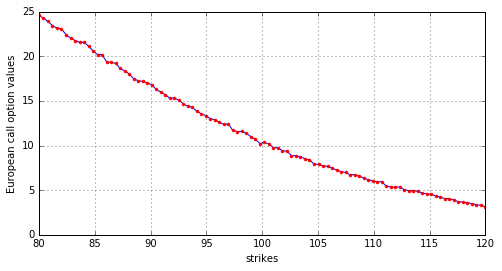

In [54]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(strikes, option_values_seq, 'b')
plt.plot(strikes, option_values_seq, 'r.')
plt.grid(True)
plt.xlabel('strikes')
plt.ylabel('European call option values')

    多进程平行运算

'''
Windows下面的multiprocessing跟Linux下面略有不同，Linux下面基于fork，fork之后所有的本地变量都复制一份，因此可以使用任意的全局变量；在Windows下面，多进程是通过启动新进程完成的，所有的全局变量都是重新初始化的，在运行过程中动态生成、修改过的全局变量是不能使用的。
multiprocessing内部使用pickling传递map的参数到不同的进程，当传递一个函数或类时，pickling将函数或者类用所在模块+函数/类名的方式表示，如果对端的Python进程无法在对应的模块中找到相应的函数或者类，就会出错。当你在Interactive Console当中创建函数的时候，这个函数是动态添加到__main__模块中的，在重新启动的新进程当中不存在，所以会出错。

当不在Console中，而是在独立Python文件中运行时，你会遇到另一个问题：
由于你下面调用multiprocessing的代码没有保护，在新进程加载这个模块的时候会重新执行这段代码，创建出新的multiprocessing池，无限调用下去。解决这个问题的方法是永远把实际执行功能的代码加入到带保护的区域中：

一下平行计算可在spyder下完成


'''

In [55]:
'''
首先到http://aka.ms/vcpython27下载Visual C++ 9.0
然后安装 multiprocessing
'''
import multiprocessing as mp
import math 
import numpy as np
def simulate_geometric_brownian_motion(p): #几何布朗运动模拟
    M, I = p # 时间周期数；模拟路径数
    S0 = 100
    r = 0.05
    sigma = 0.2
    T = 1.0
    dt = T / M 
    paths = np.zeros((M+1, I)) # 建立模拟矩阵
    paths[0] = S0

    for t in range(1, M + 1):
        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * np.random.standard_normal(I))
    return paths


In [56]:
'''
if __name__ == '__main__':
    I = 10000
    M = 50 
    t = 20 # 进行20次模拟
    # 使用2核cores4线程threads的cpu进行测试
    from time import time #时间攻击
    times = [] #建立一个list用于记录模拟结果
    for w in range(1, 7):
        t0 = time() #起始时间
        pool = mp.Pool(processes=w) #使用w线程进行运算
        result =  pool.map(simulate_geometric_brownian_motion, t * [(M, I),])#将以tuple为元素的list（共t个tuple）应用到函数中
        times.append(time() - t0) #记录下运行到此的时间与t0的时间差
    print times

import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(range(1, 17), times)
plt.plot(range(1, 17), times, 'ro')
plt.grid(True)
plt.xlabel('# processes')
plt.ylabel('time')
plt.title('%d MCS' %t)
#在spyder上可以运行
'''    

"\nif __name__ == '__main__':\n    I = 10000\n    M = 50 \n    t = 20 # \xe8\xbf\x9b\xe8\xa1\x8c20\xe6\xac\xa1\xe6\xa8\xa1\xe6\x8b\x9f\n    # \xe4\xbd\xbf\xe7\x94\xa82\xe6\xa0\xb8cores4\xe7\xba\xbf\xe7\xa8\x8bthreads\xe7\x9a\x84cpu\xe8\xbf\x9b\xe8\xa1\x8c\xe6\xb5\x8b\xe8\xaf\x95\n    from time import time #\xe6\x97\xb6\xe9\x97\xb4\xe6\x94\xbb\xe5\x87\xbb\n    times = [] #\xe5\xbb\xba\xe7\xab\x8b\xe4\xb8\x80\xe4\xb8\xaalist\xe7\x94\xa8\xe4\xba\x8e\xe8\xae\xb0\xe5\xbd\x95\xe6\xa8\xa1\xe6\x8b\x9f\xe7\xbb\x93\xe6\x9e\x9c\n    for w in range(1, 7):\n        t0 = time() #\xe8\xb5\xb7\xe5\xa7\x8b\xe6\x97\xb6\xe9\x97\xb4\n        pool = mp.Pool(processes=w) #\xe4\xbd\xbf\xe7\x94\xa8w\xe7\xba\xbf\xe7\xa8\x8b\xe8\xbf\x9b\xe8\xa1\x8c\xe8\xbf\x90\xe7\xae\x97\n        result =  pool.map(simulate_geometric_brownian_motion, t * [(M, I),])#\xe5\xb0\x86\xe4\xbb\xa5tuple\xe4\xb8\xba\xe5\x85\x83\xe7\xb4\xa0\xe7\x9a\x84list\xef\xbc\x88\xe5\x85\xb1t\xe4\xb8\xaatuple\xef\xbc\x89\xe5\xba\x94\xe7\x94\xa8\xe5\

In [57]:
#动态编译 dynamic compiling

In [58]:
#进行一个简单的大计算量loop 
from math import cos, log
def f_py(I, J):
    res = 0
    for i in range(I):
        for j in range(J):
            res += int(cos(log(1)))
    return res
I, J = 5000, 5000
%time f_py(I, J)

Wall time: 14.4 s


25000000

In [59]:
import numpy as np
def f_np(I, J):
    a = np.ones((I, J), dtype=np.float64)
    return int(np.sum(np.cos(np.log(a)))), a
%time res, a = f_ny(I, J)

Wall time: 727 ms


In [60]:
a.nbytes #查看变量占用的内存数量

200000000

In [61]:
a = 0 #释放内存

In [62]:
#如果i,j特别大，而内存不够大，那么numpy方法就不能用了。

In [63]:
import numba as nb
f_nb = nb.jit(f_py) 
#命令：调用jit函数，以此运行之前的纯py函数f_py。提高了纯python的效率，同时避免使用numpy而大量占用内存的缺点。
%time f_nb(I, J)

Wall time: 90 ms


25000000

In [73]:
I, J = 5000, 5000
func_list = ['f_py', 'f_np', 'f_nb']
data_list = 3 * ['I, J']

In [74]:
perf_comp_data(func_list, data_list) #居然是nb最快，不一定对所有代数式都有效，但值得一试

function f_nb, av. time sec:   0.00000relative: 1.00000
function f_np, av. time sec:   0.61826relative: 162493.59874
function f_py, av. time sec:  12.55272relative: 3299134.27450


In [1]:
#用利率的二项式树对期权进行定价。此前使用蒙特卡洛模拟定价
#利率是波动的,σ代表利率的波动，以无风险利率的compound为中心[e^(r * Δt)]，上下对称，分别为 u 和 d， u和d之间的距离为2个σ(西格玛)，d < u， 
# u = e ^ [σ *  (Δt^ 0.5)]
#将当下s与到期T之间分为无数个等份，每份为t
#t时间的r = e^(r * Δt)
#向上的风险中性概率为 q = (e^(r * Δt)-d) / (u-d)
#Ss为当下资产或者指数价格，那么在之后的t时刻，St 应该等于 Ss乘以 d,或者 u （分别为低值或高值）


In [ ]:
# model & option parameters
S0 = 100. #指数在零时刻的价格
T = 1 到期日为1年
r = 0.05 #无风险利率
vola = 0.20
# time parameters
M = 1000 #分多少步走到maturity，time steps 
dt =  T / M 
df = exp(-r * dt)#贴现因子， exp为以e为底的幂